In [ ]:
""" 
Visualize the height histogram for nose and throat using dimension 2
- One histogram for the distances bewteen a random point in nose and sample other points in nose
- One histogram for the distances between a random point in nose and sample other points in throat
"""

# get nose and throat points into different dataframes


# nsimplices_heights(dis_sq, num_total_point, num_group, point_index, num_simplex_point)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import pdist, squareform


In [21]:
# import nSimplices 
# get_ipython().run_line_magic('matplotlib', 'widget')
exec(compile(open(r"../nsimplices.py", encoding="utf8").read(), "nsimplices.py", 'exec'))

# set matplotlib default savefig directory
plt.rcParams["savefig.directory"] = os.getcwd() # To save figures to directory
                                                #   defined above

In [22]:
target_sites = ['NOSE', 'THROAT']

In [31]:
"""
Prepare dataset (target sites into different dataframes)
"""

def prepare_df(target_sites):

    data_dir = "../data/"
    output_dir = "../outputs"
    file = "hmp_v13lqphylotypeQuantE_rs_c.csv"
    indicator_df = pd.read_csv(os.path.join(data_dir, "hmp_v13lqphylotypePheno_rs_c.csv"), header=0)

    data_path = os.path.join(data_dir, file)
    df_hmp_ori = np.loadtxt(data_path, delimiter=",")
    df_hmps = []

    # selecting rows for site
    for site in target_sites:
        df_hmp = []
        for index, row in indicator_df.iterrows():
            if row[site]:
                df_hmp.append(df_hmp_ori[index])
        df_hmp = np.array(df_hmp)
        df_hmps.append(df_hmp)
    return df_hmps


In [32]:
print(target_sites[0], "shape is:", df_hmps[0].shape)
print(target_sites[1], "shape is:", df_hmps[1].shape)

NOSE shape is: (136, 425)
THROAT shape is: (134, 425)


In [33]:
def combined_hmp(point_index, df_hmps):
    """ 
    Compute the combined hmp dataframe with
        - one point in nose with point_index (first site), \
        - other points in throat (second site)

    :param int point_index: the index for the point in the first site
    :param list[dataframe]: the two dataframes for two sites
    """
    # print(df_hmps[0][point_index].shape)
    combined_hmp = np.concatenate((df_hmps[0][point_index].reshape(1, df_hmps[0].shape[1]), df_hmps[1]), axis=0)
    # print(combined_hmp.shape)
    return combined_hmp

In [34]:
def compute_heights(hmp_df, subspace_dim, point_index):
    """ 
    Compute heights between the first point in combined_hmp and the nSimplices \
        formed by other points in combined_hmp of dimension subspace_dim
    
    :pram int point_index: the index of the point in the dataframe to calculate heights
    """
    num_group = 100
    dis=pdist(hmp_df)
    dis_sq=squareform(dis)
    heights = nsimplices_heights(dis_sq, dis_sq.shape[0], num_group, point_index, subspace_dim)
    return heights

In [55]:
def entire_proc():
    """ 
    Entire procedure to compute the heights 
    """
    point_index = 0
    subspace_dim = 3
    two_site_heights = []
    one_site_heights = []
    df_hmps = prepare_df(target_sites)
    two_site_point_index = 0
    for point_index in range(df_hmps[0].shape[0]):
        combined_hmp_dfs = combined_hmp(point_index, df_hmps) # point index of the first site and the entire second site
        cur_two_site_heights = compute_heights(combined_hmp_dfs, subspace_dim, two_site_point_index)
        cur_one_site_heights = compute_heights(df_hmps[0], subspace_dim, point_index)
        two_site_heights.extend(cur_two_site_heights)
        one_site_heights.extend(cur_one_site_heights)
    return two_site_heights, one_site_heights


In [56]:
two_site_heights, one_site_heights = entire_proc()
print(len(two_site_heights))

13600


Text(0.5, 1.0, 'Distribution of heights between a point in nose \n and 3-Simplices formed by points in nose')

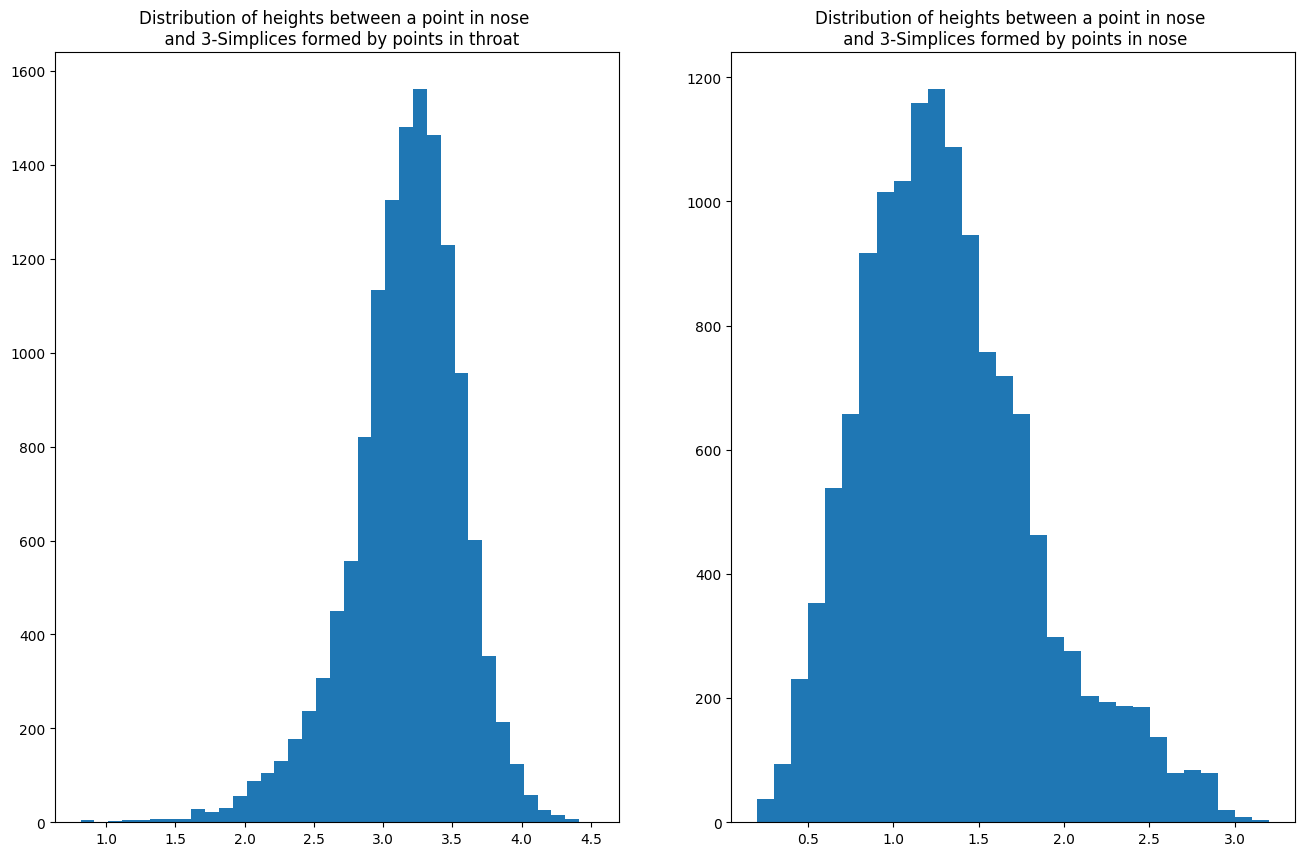

In [62]:
plt.figure(figsize=(16, 10))

bin_width = 0.1
plt.subplot(1, 2, 1)
plt.hist(two_site_heights, bins=np.arange(min(two_site_heights), max(two_site_heights) + bin_width, bin_width))
plt.title("Distribution of heights between a point in nose \n  and 3-Simplices formed by points in throat")


bin_width = 0.1
plt.subplot(1, 2, 2)
plt.hist(one_site_heights, bins=np.arange(min(one_site_heights), max(one_site_heights) + bin_width, bin_width))
plt.title("Distribution of heights between a point in nose \n and 3-Simplices formed by points in nose")